<a href="https://colab.research.google.com/github/sudhanshuranjan277/GlobalEconomicsIndicators/blob/main/Globaleconomicindicators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/economic_indicators_dataset_2010_2023.csv')
df.head()

,Date,Country,Inflation Rate (%),GDP Growth Rate (%),Unemployment Rate (%),Interest Rate (%),Stock Index Value
0,2010-01-31,Brazil,1.23,0.69,10.48,7.71,21748.85
1,2010-01-31,France,6.76,2.59,4.27,7.39,10039.56
2,2010-01-31,USA,7.46,4.84,2.64,6.39,13129.10
3,2010-02-28,Brazil,5.43,0.31,8.26,6.09,23304.58
4,2010-02-28,Canada,0.69,-0.52,11.92,-0.51,16413.03


In [ ]:
df.tail()

,Date,Country,Inflation Rate (%),GDP Growth Rate (%),Unemployment Rate (%),Interest Rate (%),Stock Index Value
495,2023-08-31,Japan,5.71,-3.85,4.69,8.50,5968.07
496,2023-08-31,UK,4.82,8.95,10.91,8.87,21731.52
497,2023-09-30,USA,7.32,0.61,9.36,4.58,38924.38
498,2023-10-31,Germany,8.04,-2.23,2.89,8.04,39107.07
499,2023-11-30,Australia,9.23,6.16,6.78,9.49,21072.66


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   500 non-null    object 
 1   Country                500 non-null    object 
 2   Inflation Rate (%)     500 non-null    float64
 3   GDP Growth Rate (%)    500 non-null    float64
 4   Unemployment Rate (%)  500 non-null    float64
 5   Interest Rate (%)      500 non-null    float64
 6   Stock Index Value      500 non-null    float64
dtypes: float64(5), object(2)
memory usage: 27.5+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Inflation Rate (%),500.0,5.08514,2.956330,0.00,2.5250,5.205,7.7100,9.99
GDP Growth Rate (%),500.0,2.41478,4.074762,-5.00,-1.1700,2.580,5.4450,9.93
Unemployment Rate (%),500.0,6.90672,2.982406,2.00,4.2575,6.865,9.5025,11.97
Interest Rate (%),500.0,4.69818,3.152877,-0.98,2.0275,4.975,7.3525,10.00
Stock Index Value,500.0,20926.22654,11066.259233,1017.27,11587.8625,20996.210,30824.8475,39982.21


<Axes: >

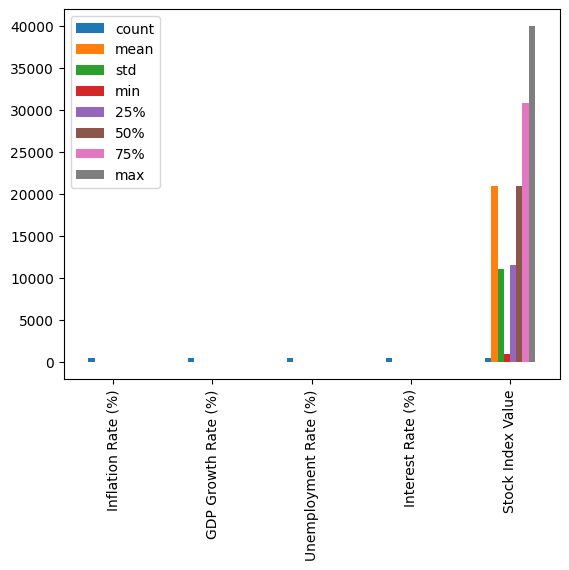

In [ ]:
df.describe().T.plot(kind='bar')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum()

,0
Date,0
Country,0
Inflation Rate (%),0
GDP Growth Rate (%),0
Unemployment Rate (%),0
Interest Rate (%),0
Stock Index Value,0


In [ ]:
import plotly.express as px
import pandas as pd

# Assuming df is already defined


numeric_df = df.select_dtypes(include=[float, int])


correlation_matrix = numeric_df.corr()


fig = px.imshow(correlation_matrix, text_auto=True, aspect="auto",
                title='Correlation Matrix',
                color_continuous_scale='RdBu_r')
fig.show()

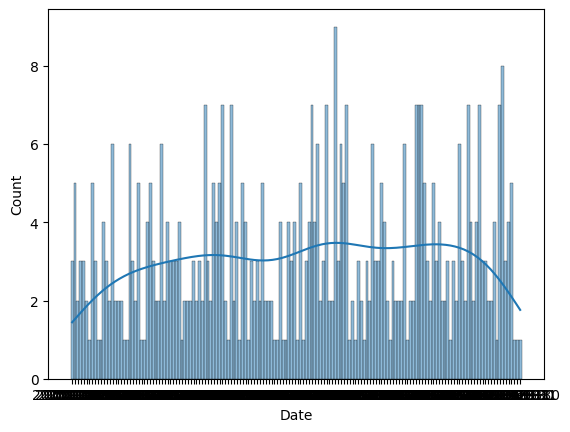

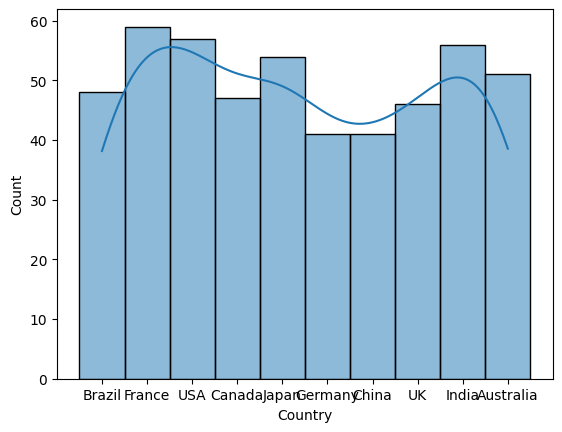

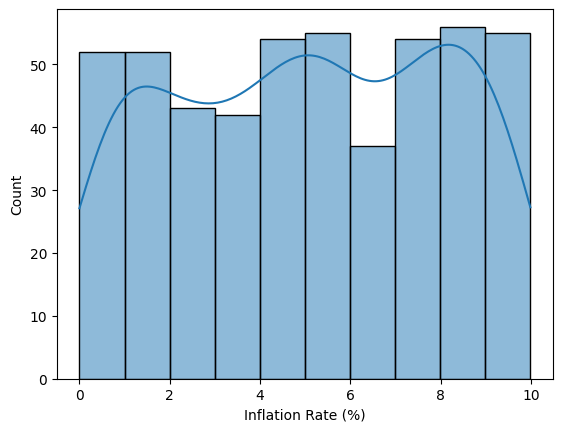

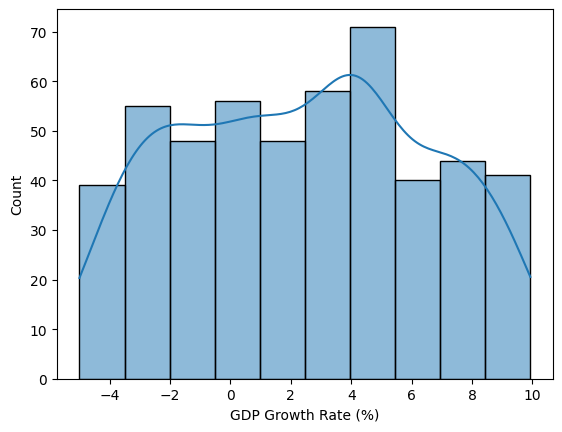

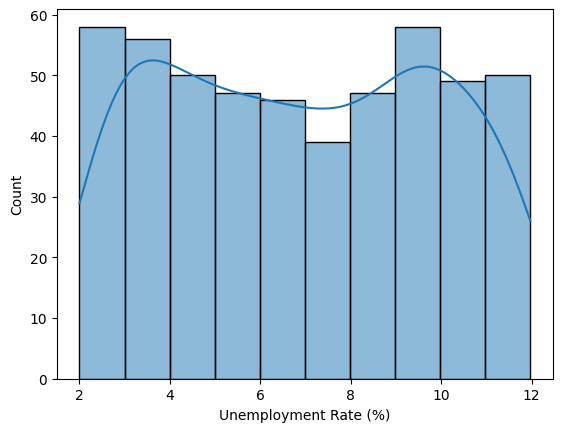

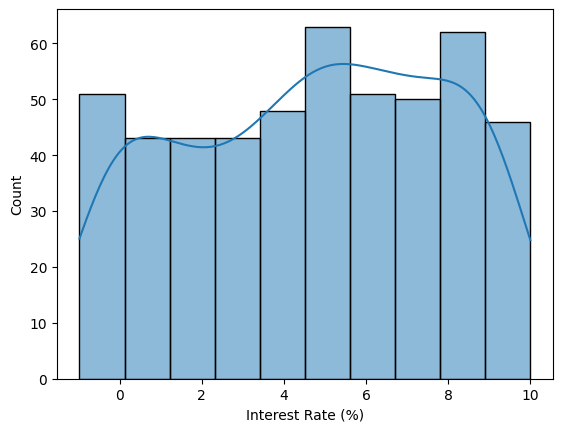

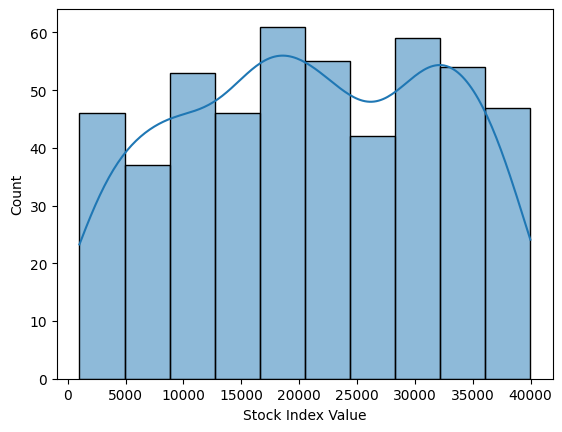

In [ ]:
for col in df:
    sns.histplot(x=col,data=df,kde=True)
    plt.show()

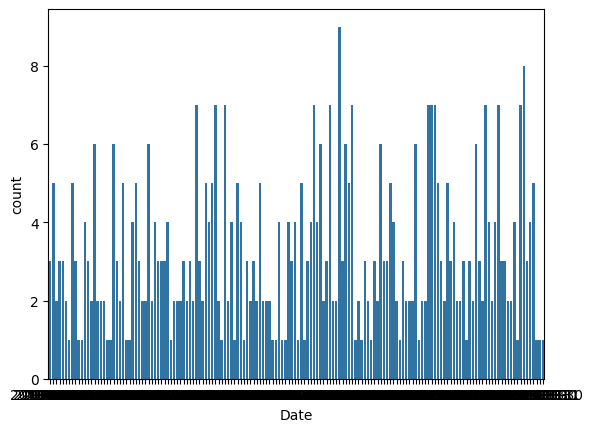

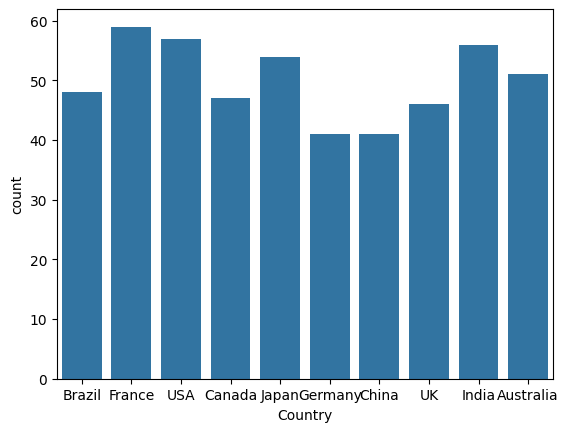

In [ ]:
for col in df:
    if df[col].dtype == 'O':
        sns.countplot(x=col,data=df)
        plt.show()

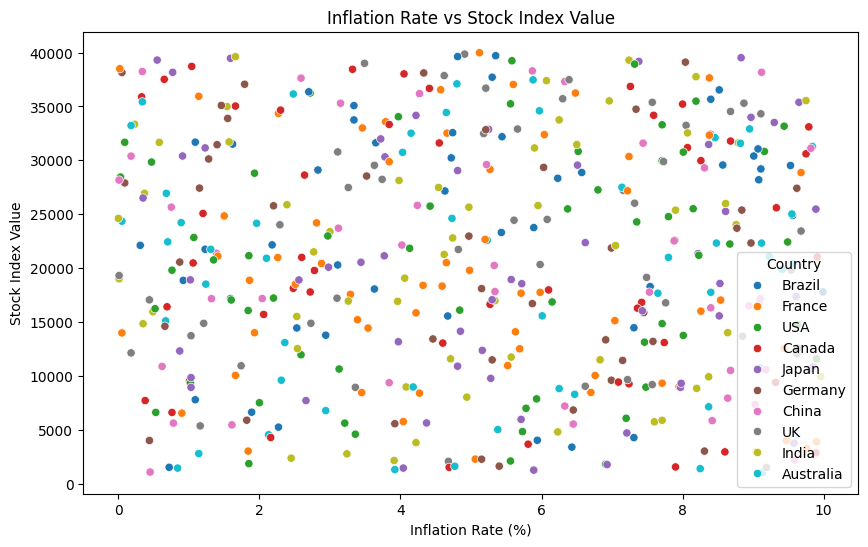

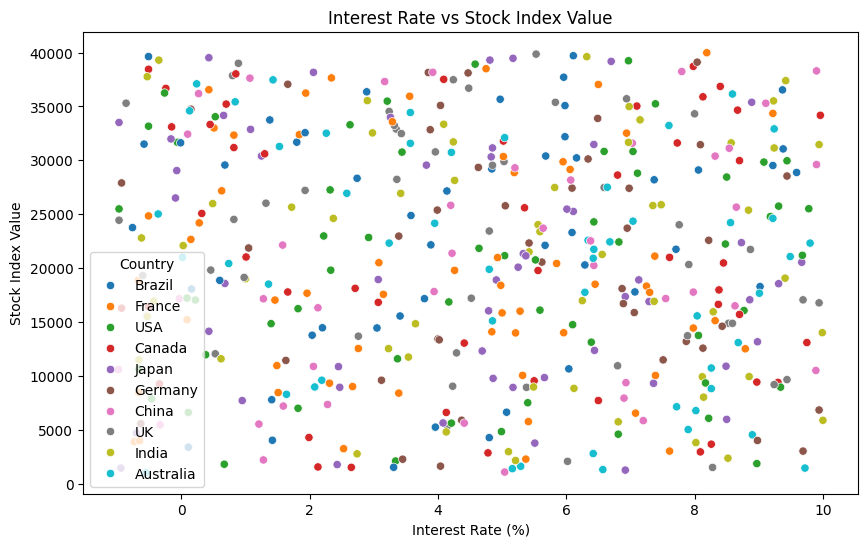

In [ ]:
# EDA: Visualizing relationships between variables
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Inflation Rate (%)', y='Stock Index Value', hue='Country', data=df)
plt.title('Inflation Rate vs Stock Index Value')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Interest Rate (%)', y='Stock Index Value', hue='Country', data=df)
plt.title('Interest Rate vs Stock Index Value')
plt.show()

In [ ]:
# Group by Country and calculate the average Stock Index Value
stock_index = df.groupby('Country')['Stock Index Value'].mean().reset_index()

# Create a bar plot for Stock Index Value
fig_stock = px.bar(stock_index, x='Country', y='Stock Index Value',
                   title='Average Stock Index Value by Country',
                   labels={'Stock Index Value': 'Stock Index Value'})

fig_stock.show()

In [ ]:
# Create a multi-colored bar plot for Stock Index Value
fig_stock = px.bar(stock_index, x='Country', y='Stock Index Value',
                   title='Average Stock Index Value by Country',
                   labels={'Stock Index Value': 'Stock Index Value'},
                   color='Country')  # Color by country for distinct colors

fig_stock.show()

In [ ]:
df.columns.tolist()

['Date',
 'Country',
 'Inflation Rate (%)',
 'GDP Growth Rate (%)',
 'Unemployment Rate (%)',
 'Interest Rate (%)',
 'Stock Index Value']

In [ ]:
import plotly.express as px
import pandas as pd

# Assuming df is already defined and contains the data

# Define the columns you want to plot
columns = ['Date',
 'Country',
 'Inflation Rate (%)',
 'GDP Growth Rate (%)',
 'Unemployment Rate (%)',
 'Interest Rate (%)',
 'Stock Index Value']
# Iterate through each column and create a bar chart or histogram
for column in columns:
    try:
        if column not in df.columns:
            print(f"Column {column} does not exist in the DataFrame")
            continue

        # Check if the column is suitable for a bar chart (categorical data)
        if df[column].dtype == 'object' or df[column].dtype.name == 'category':
            # Count the occurrences of each unique value
            column_counts = df[column].value_counts().reset_index()
            column_counts.columns = [column, 'count']

            # Create a bar chart using plotly.express
            fig = px.bar(
                column_counts,
                x=column,
                y='count',
                title=f'Distribution of {column}',
                labels={column: column, 'count': 'Count'},
                text='count'
            )

            # Update layout for better readability
            fig.update_layout(
                xaxis_title=column,
                yaxis_title='Count',
                paper_bgcolor='rgba(0,0,0,0)',
                plot_bgcolor='rgba(0,0,0,0)',
                title_font=dict(size=18, family="Arial"),
                xaxis={'categoryorder': 'total descending'}
            )

            # Show the figure
            fig.show()

        # For numerical data
        elif df[column].dtype in ['int64', 'float64']:
            # Create a histogram for numerical columns
            fig = px.histogram(
                df,
                x=column,
                title=f'Distribution of {column}',
                labels={column: column, 'count': 'Count'}
            )

            # Update layout for better readability
            fig.update_layout(
                xaxis_title=column,
                yaxis_title='Count',
                paper_bgcolor='rgba(0,0,0,0)',
                plot_bgcolor='rgba(0,0,0,0)',
                title_font=dict(size=18, family="Arial")
            )

            # Show the figure
            fig.show()

    except Exception as e:
        print(f"Could not create plot for column {column}: {e}")


In [ ]:
df

,Date,Country,Inflation Rate (%),GDP Growth Rate (%),Unemployment Rate (%),Interest Rate (%),Stock Index Value
0,2010-01-31,Brazil,1.23,0.69,10.48,7.71,21748.85
1,2010-01-31,France,6.76,2.59,4.27,7.39,10039.56
2,2010-01-31,USA,7.46,4.84,2.64,6.39,13129.10
3,2010-02-28,Brazil,5.43,0.31,8.26,6.09,23304.58
4,2010-02-28,Canada,0.69,-0.52,11.92,-0.51,16413.03
...,...,...,...,...,...,...,...
495,2023-08-31,Japan,5.71,-3.85,4.69,8.50,5968.07
496,2023-08-31,UK,4.82,8.95,10.91,8.87,21731.52
497,2023-09-30,USA,7.32,0.61,9.36,4.58,38924.38
498,2023-10-31,Germany,8.04,-2.23,2.89,8.04,39107.07


from matplotlib import pyplot as plt
df['Inflation Rate (%)'].plot(kind='hist', bins=20, title='Inflation Rate (%)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['GDP Growth Rate (%)'].plot(kind='hist', bins=20, title='GDP Growth Rate (%)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Unemployment Rate (%)'].plot(kind='hist', bins=20, title='Unemployment Rate (%)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Interest Rate (%)'].plot(kind='hist', bins=20, title='Interest Rate (%)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Inflation Rate (%)', y='GDP Growth Rate (%)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='GDP Growth Rate (%)', y='Unemployment Rate (%)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Unemployment Rate (%)', y='Interest Rate (%)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Interest Rate (%)', y='Stock Index Value', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Inflation Rate (%)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Inflation Rate (%)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['GDP Growth Rate (%)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('GDP Growth Rate (%)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Unemployment Rate (%)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Unemployment Rate (%)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Interest Rate (%)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Interest Rate (%)')

from matplotlib import pyplot as plt
df['Inflation Rate (%)'].plot(kind='line', figsize=(8, 4), title='Inflation Rate (%)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['GDP Growth Rate (%)'].plot(kind='line', figsize=(8, 4), title='GDP Growth Rate (%)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Unemployment Rate (%)'].plot(kind='line', figsize=(8, 4), title='Unemployment Rate (%)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Interest Rate (%)'].plot(kind='line', figsize=(8, 4), title='Interest Rate (%)')
plt.gca().spines[['top', 'right']].set_visible(False)

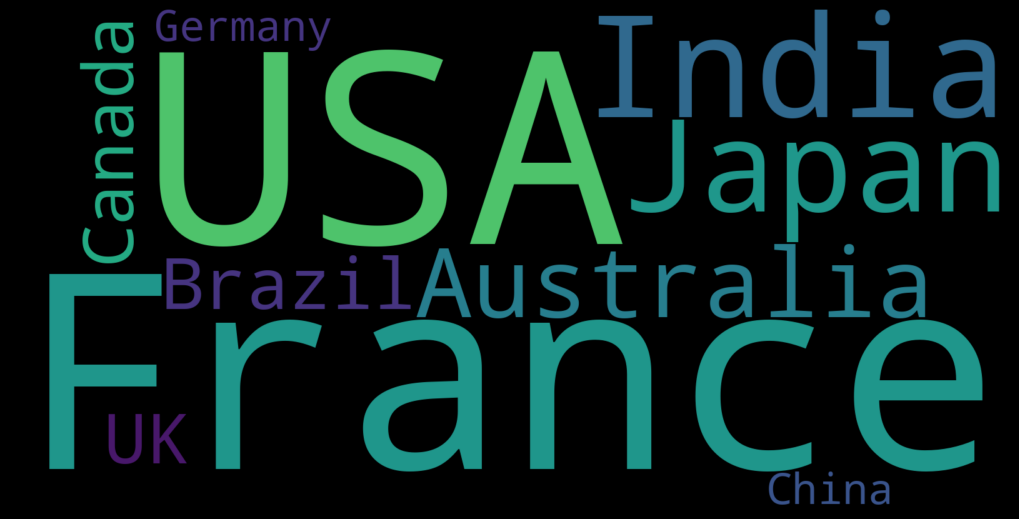

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import pandas as pd

# Assuming `dataset` is your DataFrame and `stop_words_list` is a list of stopwords

# Example stopwords list, modify as needed
stop_words_list = set(STOPWORDS)

# Generate frequency counts from the 'business_category' column
counts = Counter(df["Country"].dropna().apply(lambda x: str(x)))

# Generate the word cloud
wcc = WordCloud(
    background_color="black",
    width=1600, height=800,
    max_words=2000,
    stopwords=stop_words_list
)
wcc.generate_from_frequencies(counts)

# Display the word cloud
plt.figure(figsize=(10, 5), facecolor='k')
plt.imshow(wcc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()